In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Students Social Media Addiction.csv")

In [3]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [4]:
# Drop irrelevant column
df.drop(columns=["Student_ID"], inplace=True)

# Check and display missing values
print("Missing Values:\n", df.isnull().sum())

# Standardize binary column
df["Affects_Academic_Performance"] = df["Affects_Academic_Performance"].str.strip().str.lower()
df["Affects_Academic_Performance"] = df["Affects_Academic_Performance"].replace({"yes": 1, "no": 0})

# Convert to categorical type
categorical_cols = ["Gender", "Academic_Level", "Country", "Most_Used_Platform", "Relationship_Status"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Show basic info
df.info()


Missing Values:
 Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           705 non-null    int64   
 1   Gender                        705 non-null    category
 2   Academic_Level                705 non-null    category
 3   Country                       705 non-null    category
 4   Avg_Daily_Usage_Hours         705 non-null    float64 
 5   Most_Used_Platform            70

<ipython-input-4-1095808663>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Affects_Academic_Performance"] = df["Affects_Academic_Performance"].replace({"yes": 1, "no": 0})


In [5]:
# Summary of all columns
df.describe(include='all')


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705,705,705,705.000000,705,705.000000,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,2,3,110,NaN,12,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Female,Undergraduate,India,NaN,Instagram,NaN,NaN,NaN,Single,NaN,NaN
freq,NaN,353,353,53,NaN,249,NaN,NaN,NaN,384,NaN,NaN
mean,20.659574,NaN,NaN,NaN,4.918723,NaN,0.642553,6.868936,6.226950,NaN,2.849645,6.436879
std,1.399217,NaN,NaN,NaN,1.257395,NaN,0.479588,1.126848,1.105055,NaN,0.957968,1.587165
min,18.000000,NaN,NaN,NaN,1.500000,NaN,0.000000,3.800000,4.000000,NaN,0.000000,2.000000
25%,19.000000,NaN,NaN,NaN,4.100000,NaN,0.000000,6.000000,5.000000,NaN,2.000000,5.000000
50%,21.000000,NaN,NaN,NaN,4.800000,NaN,1.000000,6.900000,6.000000,NaN,3.000000,7.000000
75%,22.000000,NaN,NaN,NaN,5.800000,NaN,1.000000,7.700000,7.000000,NaN,4.000000,8.000000


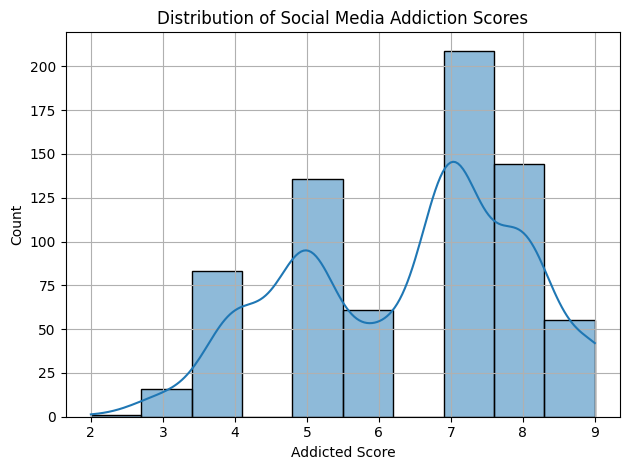

In [6]:
sns.histplot(df["Addicted_Score"], kde=True, bins=10)
plt.title("Distribution of Social Media Addiction Scores")
plt.xlabel("Addicted Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


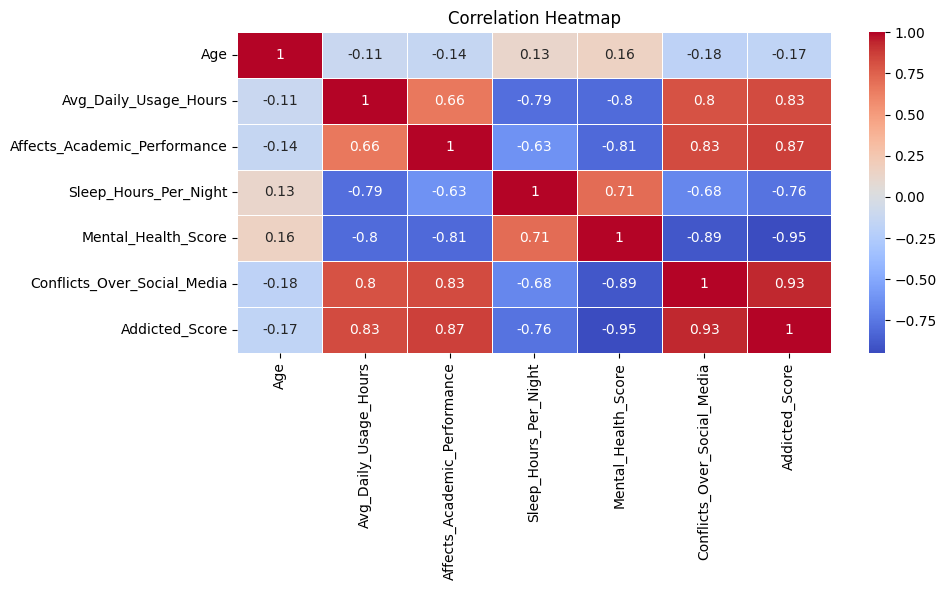

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


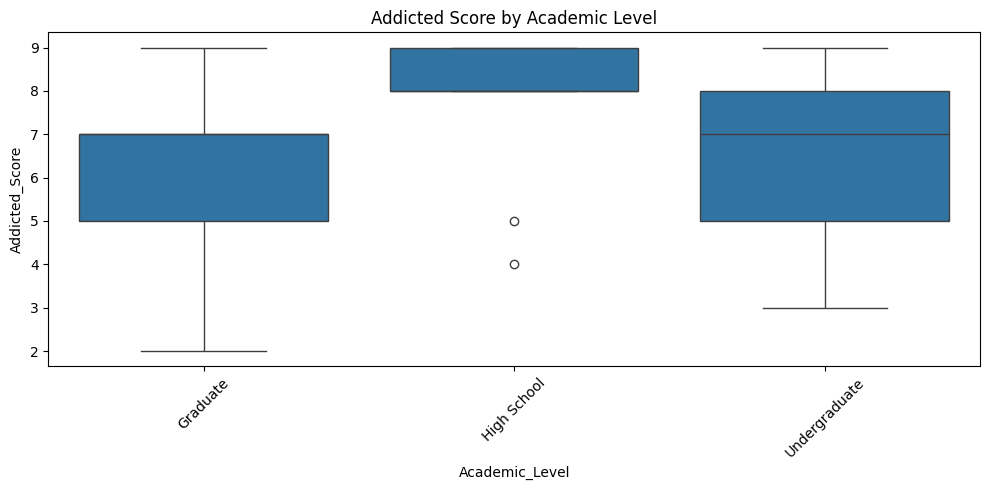

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Academic_Level", y="Addicted_Score", data=df)
plt.xticks(rotation=45)
plt.title("Addicted Score by Academic Level")
plt.tight_layout()
plt.show()


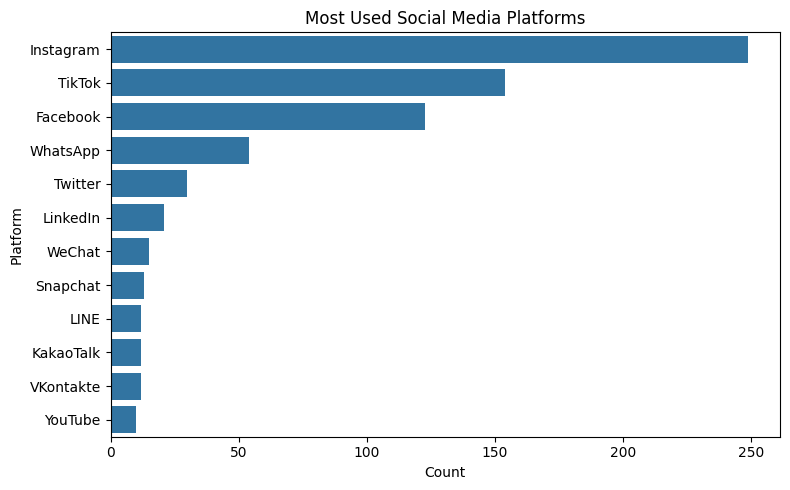

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(y="Most_Used_Platform", data=df, order=df["Most_Used_Platform"].value_counts().index)
plt.title("Most Used Social Media Platforms")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()


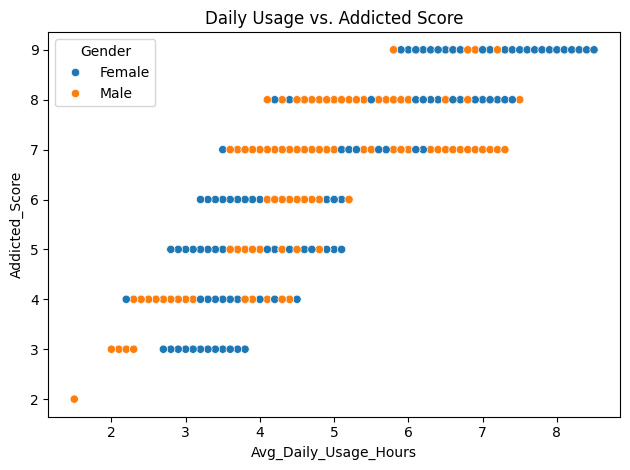

In [10]:
sns.scatterplot(data=df, x="Avg_Daily_Usage_Hours", y="Addicted_Score", hue="Gender")
plt.title("Daily Usage vs. Addicted Score")
plt.tight_layout()
plt.show()


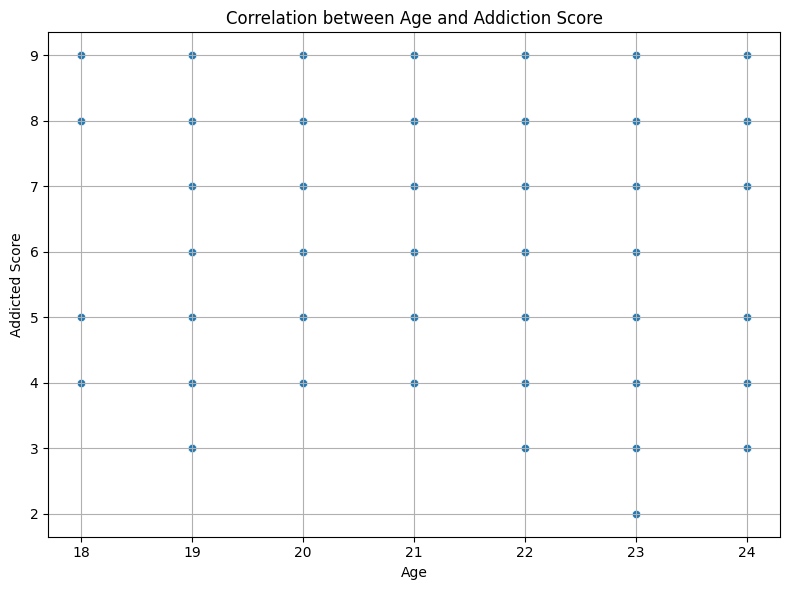

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Addicted_Score')
plt.title('Correlation between Age and Addiction Score')
plt.xlabel('Age')
plt.ylabel('Addicted Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
print("Addiction by Relationship Status:")
print(df.groupby("Relationship_Status")["Addicted_Score"].mean().sort_values(ascending=False))


Addiction by Relationship Status:
Relationship_Status
Complicated        7.031250
Single             6.458333
In Relationship    6.342561
Name: Addicted_Score, dtype: float64


<ipython-input-12-18595527>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Relationship_Status")["Addicted_Score"].mean().sort_values(ascending=False))


In [13]:
print("Addiction by Most Used Platform:")
print(df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False))


Addiction by Most Used Platform:
Most_Used_Platform
WhatsApp     7.462963
Snapchat     7.461538
TikTok       7.428571
Instagram    6.554217
YouTube      6.100000
WeChat       6.066667
KakaoTalk    6.000000
Facebook     5.666667
Twitter      5.500000
VKontakte    5.000000
LinkedIn     3.809524
LINE         3.000000
Name: Addicted_Score, dtype: float64


<ipython-input-13-3226299845>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False))


In [14]:
print("Correlation with Addicted Score:")
print(df.corr(numeric_only=True)["Addicted_Score"].sort_values(ascending=False))


Correlation with Addicted Score:
Addicted_Score                  1.000000
Conflicts_Over_Social_Media     0.933586
Affects_Academic_Performance    0.866049
Avg_Daily_Usage_Hours           0.832000
Age                            -0.166396
Sleep_Hours_Per_Night          -0.764858
Mental_Health_Score            -0.945051
Name: Addicted_Score, dtype: float64


#Conclusion / Report Summary:-

This analysis, through visualizations and correlations, highlights how lifestyle factors and platform preferences are associated with social media addiction and its side effects on academic and psychological outcomes.

The exploratory analysis of the *Students Social Media Addiction* dataset reveals significant behavioral patterns among students concerning their social media usage. A key finding is the strong positive correlation between *average daily usage hours* and *addiction scores*, suggesting that time spent on social platforms is a major contributor to addictive behavior.

Students who sleep fewer hours per night tend to score higher on addiction, and this group also shows lower mental health scores, indicating a possible negative impact on well-being. Furthermore, platform-specific trends emerged: users of TikTok and Instagram demonstrated higher addiction levels compared to those who favor platforms like Facebook or LinkedIn.

Interestingly, academic performance is perceived to be affected more among students in “Complicated” relationship statuses or those with intense usage patterns. These insights can inform educators, mental health professionals, and policy-makers about potential risk groups needing intervention or support.





---

## 🎯 Research Question

**"How do daily usage patterns, preferred social media platforms, and sleep duration relate to social media addiction levels among students, and what impact do these factors have on academic performance and mental health?"**

This research question focuses on the interrelationships between time spent on social media, behavioral patterns, and their influence on students’ academic and psychological outcomes. The question is grounded in the dataset and supported by quantitative and visual analysis.


---

## 🎯 Alternative Research Question

**"To what extent does mental health mediate the relationship between social media addiction and academic performance among students?"**

This question aims to explore not just whether addiction to social media affects academic outcomes, but *how* it does so—specifically, whether declining mental health serves as a key intermediary. By examining this mediating effect, we can better understand the psychological pathway from overuse of social platforms to reduced academic performance. This approach provides richer insights for educators, counselors, and researchers focused on student well-being and academic success.

---


We hypothesize that:
- **Addicted_Score** positively affects **Mental_Health_Score** (i.e., more addiction → lower mental health).
- **Mental_Health_Score** then affects **Affects_Academic_Performance** (i.e., lower mental health → more likely academic impact).
- Thus, **Mental Health acts as a mediator** between addiction and academic outcomes.


